Importing the Libraries

In [1]:
import numpy
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import  imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,LSTM,Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
# Load the dataset
max_length=200
vocab_size=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Adding the Padding to the sentences, So that they have vector of same dimensions

In [3]:
# Padding the data
x_train=pad_sequences(x_train,maxlen=max_length,padding='post',truncating='post')
x_test=pad_sequences(x_test,maxlen=max_length,padding='post',truncating='post')

In [4]:
x_train.shape

(25000, 200)

In [5]:
# building the model
model=Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [7]:
# Save the best model only (lowest validation loss)
checkpoint_cb = ModelCheckpoint(
    "Sentiment_model.keras",  # filename to save
    monitor='val_loss',         # quantity to monitor
    save_best_only=True,        # only save if val_loss improves
    mode='min',                 # look for minimum
    verbose=1
)

# Stop training if val_loss doesn't improve for 2 epochs
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=2,         # how many epochs to wait
    restore_best_weights=True,  # restore best weights found
    verbose=1
)


In [8]:

history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_test,y_test),callbacks=[checkpoint_cb,earlystop_cb])

Epoch 1/10
2497/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5209 - loss: 0.6910
Epoch 1: val_loss improved from inf to 0.69302, saving model to Sentiment_model.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 22ms/step - accuracy: 0.5209 - loss: 0.6910 - val_accuracy: 0.5005 - val_loss: 0.6930
Epoch 2/10
2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5460 - loss: 0.6713
Epoch 2: val_loss improved from 0.69302 to 0.37564, saving model to Sentiment_model.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.5461 - loss: 0.6712 - val_accuracy: 0.8367 - val_loss: 0.3756
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8710 - loss: 0.3217
Epoch 3: val_loss improved from 0.37564 to 0.32806, saving model to Sentiment_model.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.8710 - loss: 0.3217 - val_accuracy: 0.8612 - val_loss: 0.3281
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9250 - loss: 0.2152
Epoch 4: val_lo

Predicting the x_test on the Model

In [9]:
y_pred=model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [10]:
print(y_train[5])
print(y_pred[5])

0
[0.6317944]


In [11]:
y_pred_class = (y_pred >= 0.5).astype(int)

print(y_pred_class[:10].flatten())  # show first 10

[0 1 1 1 1 1 1 0 1 1]


Visualization

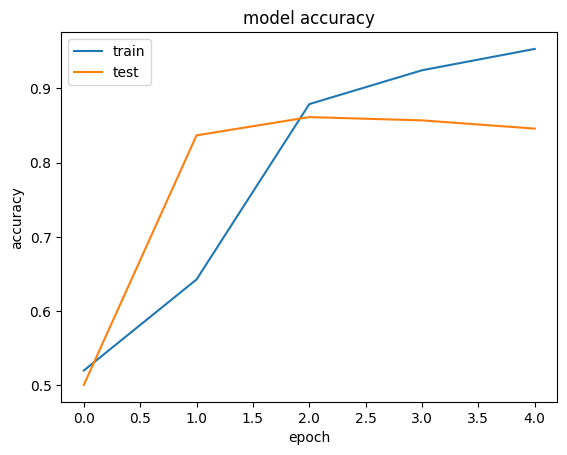

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Prediction on New data

In [15]:
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3



1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_review(text, word_index, max_length=200):
    words = text.lower().split()
    encoded = [1]  # <START> token

    for word in words:
        index = word_index.get(word, 2)  # 2 = <UNK>
        encoded.append(index)

    padded = pad_sequences([encoded], maxlen=max_length, padding='post', truncating='post')
    return padded


In [17]:
def predict_own_review(text):
    encoded_input = encode_review(text, word_index)
    prob = model.predict(encoded_input)[0][0]
    label = int(prob >= 0.5)

    print(f"Review: {text}")
    print(f"Raw probability: {prob:.4f}")
    print(f"Predicted label: {label}  (0 = Negative, 1 = Positive)")

    return label


In [20]:
predict_own_review("I bought a new phone, everything amazing except camera ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review: I bought a new phone, everything amazing except camera and peroformance
Raw probability: 0.7621
Predicted label: 1  (0 = Negative, 1 = Positive)


1